In [1]:
import os,sys
import numpy as np
import pandas as pd

In [77]:
tab=pd.read_excel('a127m413L.xlsx')

In [78]:
order=list(tab)

In [79]:
data=[]
for i in range(len(order)):
    data.append(tab[order[i]].values)
data=np.array(data).T

In [80]:
len(data)

490

In [81]:
datamean=np.mean(data,axis=0)

In [82]:
print(datamean)

[0.09893109 0.08367655 0.08268675 0.09498146 0.08707218 0.07657459
 0.09539637 0.08294256 0.06501617 0.10140587 0.07129732 0.04801088]


In [83]:
print(np.std(data,axis=0))

[0.0001598  0.00029165 0.00019483 0.00018839 0.0002604  0.00022974
 0.00035566 0.00038109 0.00028544 0.00031177 0.0002452  0.00031275]


In [84]:
cov=np.zeros((len(datamean),len(datamean)))

In [85]:
print(cov)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [86]:
for i in range(len(datamean)):
    for j in range(len(datamean)):
        for k in range(len(data)):
            cov[i][j]+=(data[k][i]-datamean[i])*(data[k][j]-datamean[j])
# cov*=(len(data)-1)

In [87]:
idx=11
for i in range(len(cov[idx])):
    print(cov[idx][i])

-6.337934252244577e-07
-2.7991021948163756e-06
-2.1064238357551134e-06
1.2492577942857377e-06
1.1274769293877876e-06
3.2322175734693497e-06
2.2162393321224488e-06
-6.214844381224062e-07
5.060857752122467e-06
1.9578020606938764e-05
5.4023486946939205e-06
4.792794563583664e-05


In [88]:
print(np.sqrt(cov[0][0]))

0.0035373590890403375


# Heat maps

In [89]:
import pylab as py

In [90]:
covnew=cov
for i in range(len(covnew)):
    covnew[i]=np.abs(covnew[i]/covnew[i][i])

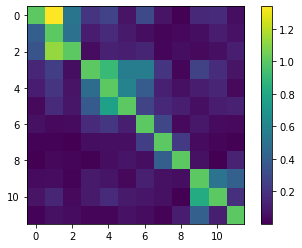

In [91]:
ax=py.subplot(111)
im=ax.imshow(np.abs(covnew))
cbar = ax.figure.colorbar(im, ax=ax)

# testing

In [24]:
std=np.zeros(len(datamean))
for i in range(len(datamean)):
#     for j in range(len(datamean)):
    for k in range(len(data)):
        std[i]+=(data[k][i]-datamean[i])**2

In [46]:
std=0
for i in range(len(data)):
    std+=np.sqrt((data[i][0]-datamean[0])**2)/len(data)

In [22]:
var=0
for i in range(len(data)):
    var+=(data[i][0]-datamean[0])**2
std=np.sqrt(var)

In [27]:
std

array([3.08696429e-05, 7.17717696e-05, 2.73076230e-05, 6.64658928e-05,
       5.26966788e-05, 1.25505890e-05, 1.07586216e-04, 7.76274379e-05,
       6.03518119e-05, 1.30311804e-04, 3.55771990e-05, 5.78067960e-05,
       5.53051569e-05, 9.09536180e-05, 8.95803205e-05, 2.61505329e-04,
       2.35683097e-04, 3.35164173e-04, 1.52086053e-04, 1.14012724e-04])

In [30]:
print(np.std(data,axis=0)*np.sqrt(len(data)-1))

[0.00555052 0.0084634  0.00522047 0.00814455 0.00725203 0.00353916
 0.01036206 0.00880188 0.00776092 0.01140407 0.00595873 0.00759552
 0.00742935 0.00952748 0.00945528 0.01615504 0.01533671 0.01828928
 0.01232005 0.01066705]
